In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# univerza předpokladů
filmy = ctrl.Antecedent(np.arange(0, 11, 1), 'Kvalita filmů')
av = ctrl.Antecedent(np.arange(0, 11, 1), 'Kvalita AV')

# Univerzum výsledků
kino = ctrl.Consequent(np.arange(0, 11, 1), 'Hodnocení kina')

In [4]:
# definice funkcí příslušnosti pro předpoklady
filmy["Mizerná"] = fuzz.trapmf(filmy.universe, [0, 0, 2, 4])
filmy["Dobrá"] = fuzz.trapmf(filmy.universe, [3, 4, 7, 8])
filmy["Vynikající"] = fuzz.trapmf(filmy.universe, [6, 8, 10, 10])

av["Mizerná"] = fuzz.trapmf(av.universe, [0, 0, 2, 4])
av["Dobrá"] = fuzz.trapmf(av.universe, [3, 4, 6, 7])
av["Vynikající"] = fuzz.trapmf(av.universe, [6, 8, 10, 10])

# fce příslušnosti pro výsledek ~ počty množin nemusejí být stejné
kino['Hrůza'] = fuzz.trapmf(kino.universe, [0, 0, 1, 3])
kino['Průměr'] = fuzz.trapmf(kino.universe, [2, 3, 6, 7])
kino['Dobré'] = fuzz.trapmf(kino.universe, [6, 7, 8, 9])
kino['Paráda'] = fuzz.trapmf(kino.universe, [8, 9, 10, 10])

In [5]:
def get_area(a, b, c, d):
    rise_triangle = (b - a) / 2
    middle_rectangle = c - b
    fall_triangle = (d - c) / 2
    return rise_triangle + middle_rectangle + fall_triangle

get_area(2, 3, 6, 7) + get_area(6, 7, 8, 9) / 2

5.0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


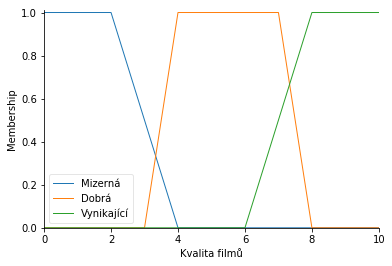

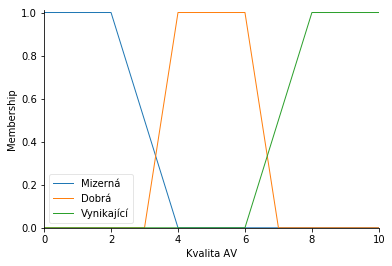

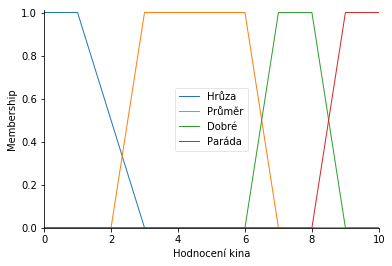

In [6]:
# vizualizace množin
filmy.view()
av.view()
kino.view()

In [7]:
# definice fuzzy pravidel
# AND &, OR |, NOT ~

rule1 = ctrl.Rule(filmy['Mizerná'] & av['Mizerná'], kino['Hrůza'])
rule2 = ctrl.Rule(filmy['Mizerná'] & ~av['Mizerná'], kino['Průměr'])
rule3 = ctrl.Rule(filmy['Dobrá'] & av['Mizerná'], kino['Průměr'])
rule4 = ctrl.Rule(filmy['Dobrá'] & (av['Dobrá'] | av['Vynikající']), kino['Dobré'])
rule5 = ctrl.Rule(filmy['Vynikající'] & ~av['Vynikající'], kino['Dobré']) #####
rule6 = ctrl.Rule(filmy['Vynikající'] & av['Vynikající'], kino['Paráda'])

In [9]:
filmy_vstup = 7
print("filmy mizerná", fuzz.interp_membership(filmy.universe, fuzz.trapmf(filmy.universe, [0, 0, 2, 4]), filmy_vstup))
print("filmy dobrá", fuzz.interp_membership(filmy.universe, fuzz.trapmf(filmy.universe, [3, 4, 7, 8]), filmy_vstup))
print("filmy vynikající", fuzz.interp_membership(filmy.universe, fuzz.trapmf(filmy.universe, [6, 8, 10, 10]), filmy_vstup))

filmy mizerná 0.0
filmy dobrá 1.0
filmy vynikající 0.5


In [10]:
av_vstup = 1
print("av mizerná", fuzz.interp_membership(filmy.universe, fuzz.trapmf(av.universe, [0, 0, 2, 4]), av_vstup))
print("av dobrá", fuzz.interp_membership(filmy.universe, fuzz.trapmf(av.universe, [3, 4, 6, 7]), av_vstup))
print("av vynikající", fuzz.interp_membership(filmy.universe, fuzz.trapmf(av.universe, [6, 8, 10, 10]), av_vstup))

av mizerná 1.0
av dobrá 0.0
av vynikající 0.0


In [11]:
# vytvoříme fuzzy systém
kina_fis = ctrl.ControlSystem([rule1, rule2, rule3, rule5, rule6])  #rule4

# vytvoříme si simulaci našeho systému
kina_sim = ctrl.ControlSystemSimulation(kina_fis)

# vstupy od uživatele
kina_sim.input['Kvalita filmů'] = 7
kina_sim.input['Kvalita AV'] = 1

# provedení simulace
kina_sim.compute()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


5.1499999999999995

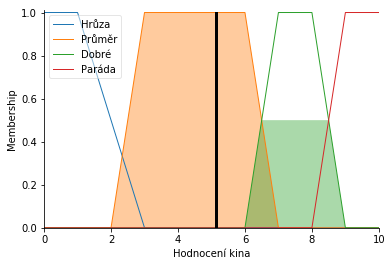

In [12]:
# zobrazení grafu výsledku
kino.view(sim=kina_sim)

# defuzzifikovaná hodnota (centroid)
kina_sim.output['Hodnocení kina']